# Kaggle Fashion MNIST

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
training = np.array(train, dtype = 'float32')
testing = np.array(test, dtype='float32')

In [7]:
training.shape

(60000, 785)

In [8]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

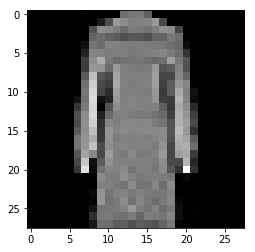

In [9]:
i = random.randint(1,60000) 
plt.imshow( training[i,1:].reshape((28,28)) ) 

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') 


In [10]:
label = training[i,0]
label

3.0

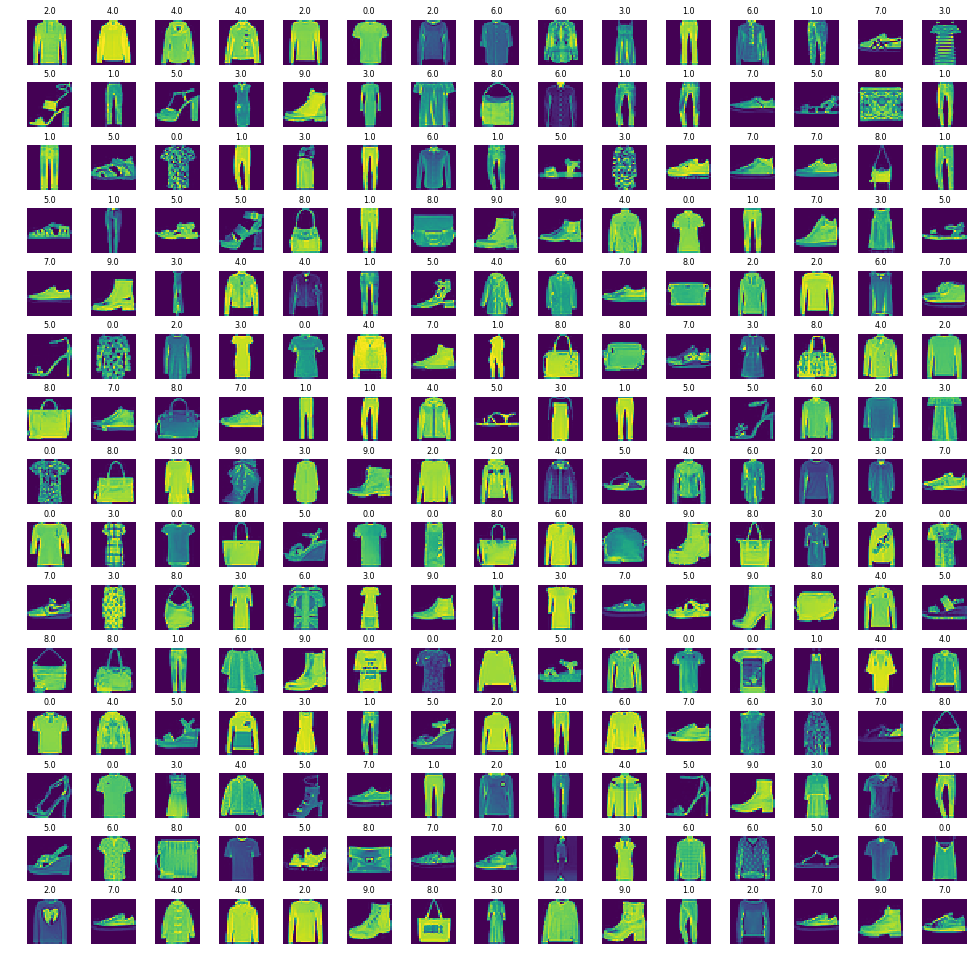

In [11]:
W_grid = 15
L_grid = 15


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() 

n_training = len(training) 


for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n_training)  
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# MODEL TRAINING 

In [12]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [14]:
X_train.shape

(48000, 784)

In [15]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [16]:
X_validate.shape

(12000, 28, 28, 1)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
cnn = Sequential()


cnn.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(output_dim = 32, activation = 'relu'))
cnn.add(Dense(output_dim = 10, activation = 'sigmoid'))


In [22]:
cnn.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [23]:
model = cnn.fit(X_train,
                y_train,
                batch_size = 512,
                nb_epoch = 50,
                verbose = 1,
                validation_data = (X_validate, y_validate))


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 132s 3ms/step - loss: 0.8590 - acc: 0.7055 - val_loss: 0.5002 - val_acc: 0.8226
Epoch 2/50
48000/48000 [==============================] - 148s 3ms/step - loss: 0.4678 - acc: 0.8379 - val_loss: 0.4236 - val_acc: 0.8534
Epoch 3/50
48000/48000 [==============================] - 142s 3ms/step - loss: 0.4205 - acc: 0.8515 - val_loss: 0.4096 - val_acc: 0.8562
Epoch 4/50
48000/48000 [==============================] - 147s 3ms/step - loss: 0.3928 - acc: 0.8615 - val_loss: 0.3872 - val_acc: 0.8655
Epoch 5/50
48000/48000 [==============================] - 167s 3ms/step - loss: 0.3627 - acc: 0.8738 - val_loss: 0.3643 - val_acc: 0.8733
Epoch 6/50
48000/48000 [==============================] - 175s 4ms/step - loss: 0.3442 - acc: 0.8789 - val_loss: 0.3490 - val_acc: 0.8739
Epoch 7/50
48000/48000 [==============================] - 173s 4ms/step - loss: 0.3271 - acc: 0.8845 - val_loss: 0.3317 - 

In [25]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 9s 931us/step
Test Accuracy : 0.914


In [26]:
predicted = cnn.predict_classes(X_test)

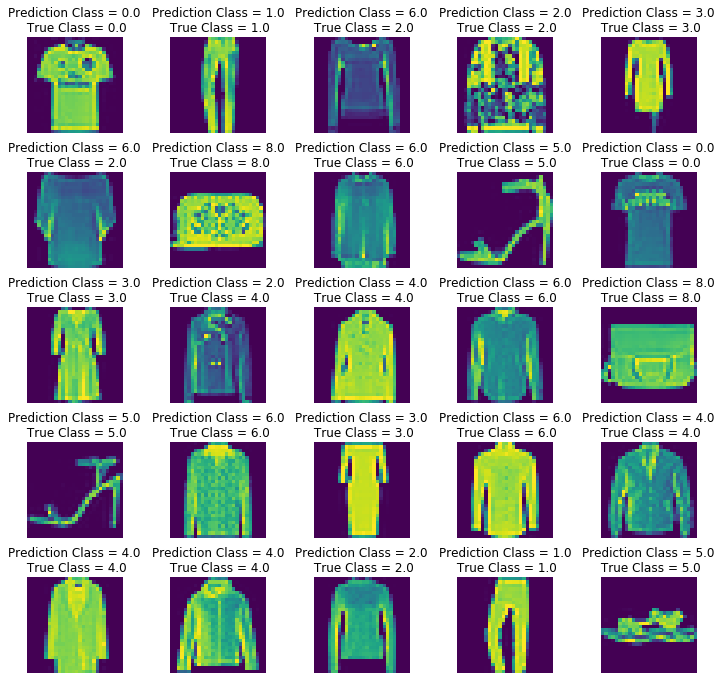

In [28]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


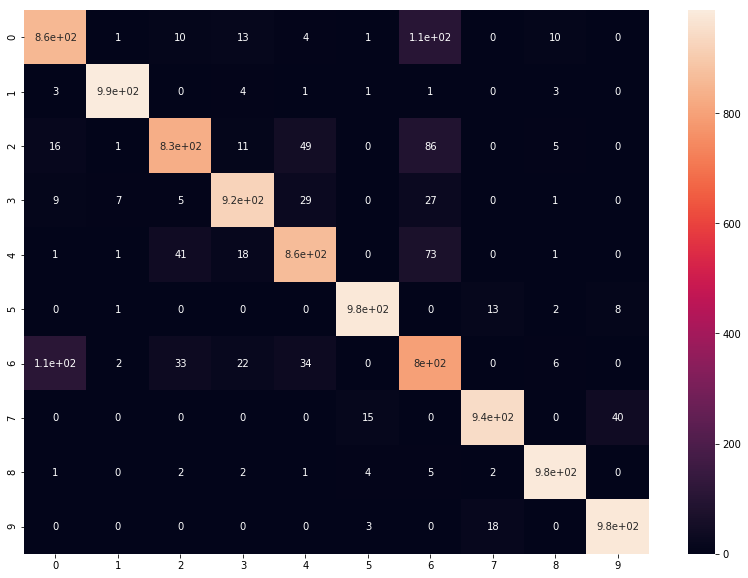

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [31]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted, target_names = target_names))

             precision    recall  f1-score   support

    Class 0       0.86      0.85      0.86      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.90      0.83      0.87      1000
    Class 3       0.93      0.92      0.93      1000
    Class 4       0.88      0.86      0.87      1000
    Class 5       0.98      0.98      0.98      1000
    Class 6       0.73      0.80      0.76      1000
    Class 7       0.97      0.94      0.96      1000
    Class 8       0.97      0.98      0.98      1000
    Class 9       0.95      0.98      0.97      1000

avg / total       0.92      0.91      0.91     10000

